In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline

In [2]:
#Read csv file

redWine = pd.read_csv("wineQualityReds.csv")
redWine = redWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide','total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]


redWine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine = pd.read_csv("wineQualityWhites.csv")
whiteWine = whiteWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide','total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
whiteWine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
combined = pd.concat([redWine, whiteWine], ignore_index=True, sort=False)
display(np.round(combined.describe()))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.0,0.0,0.0,5.0,0.0,31.0,116.0,1.0,3.0,1.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,18.0,57.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,17.0,77.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,3.0,0.0,29.0,118.0,1.0,3.0,1.0,10.0,6.0
75%,8.0,0.0,0.0,8.0,0.0,41.0,156.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,2.0,66.0,1.0,289.0,440.0,1.0,4.0,2.0,15.0,9.0


In [3]:
# Check for nulls
redWine.isnull().any()

fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#look at distribution by quality
print(redWine.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [6]:
# Some more additional data analysis
display(np.round(redWine.describe()))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


<Figure size 720x432 with 0 Axes>

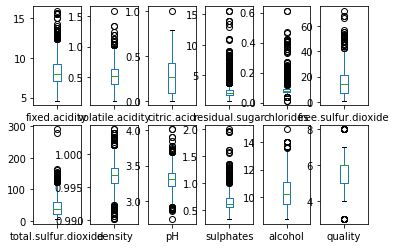

In [23]:
# distribution of the input attributes
# box and whisker plots

redWine.plot(kind='box', subplots=True, layout=(2, 6), sharex=False, sharey=False)
plt.show()

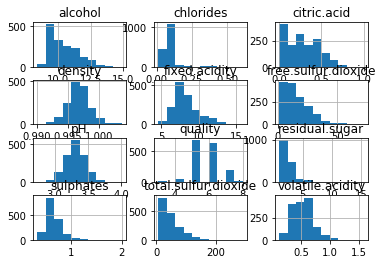

In [8]:
redWine.hist()
plt.show()

C:\Users\Krys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Krys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


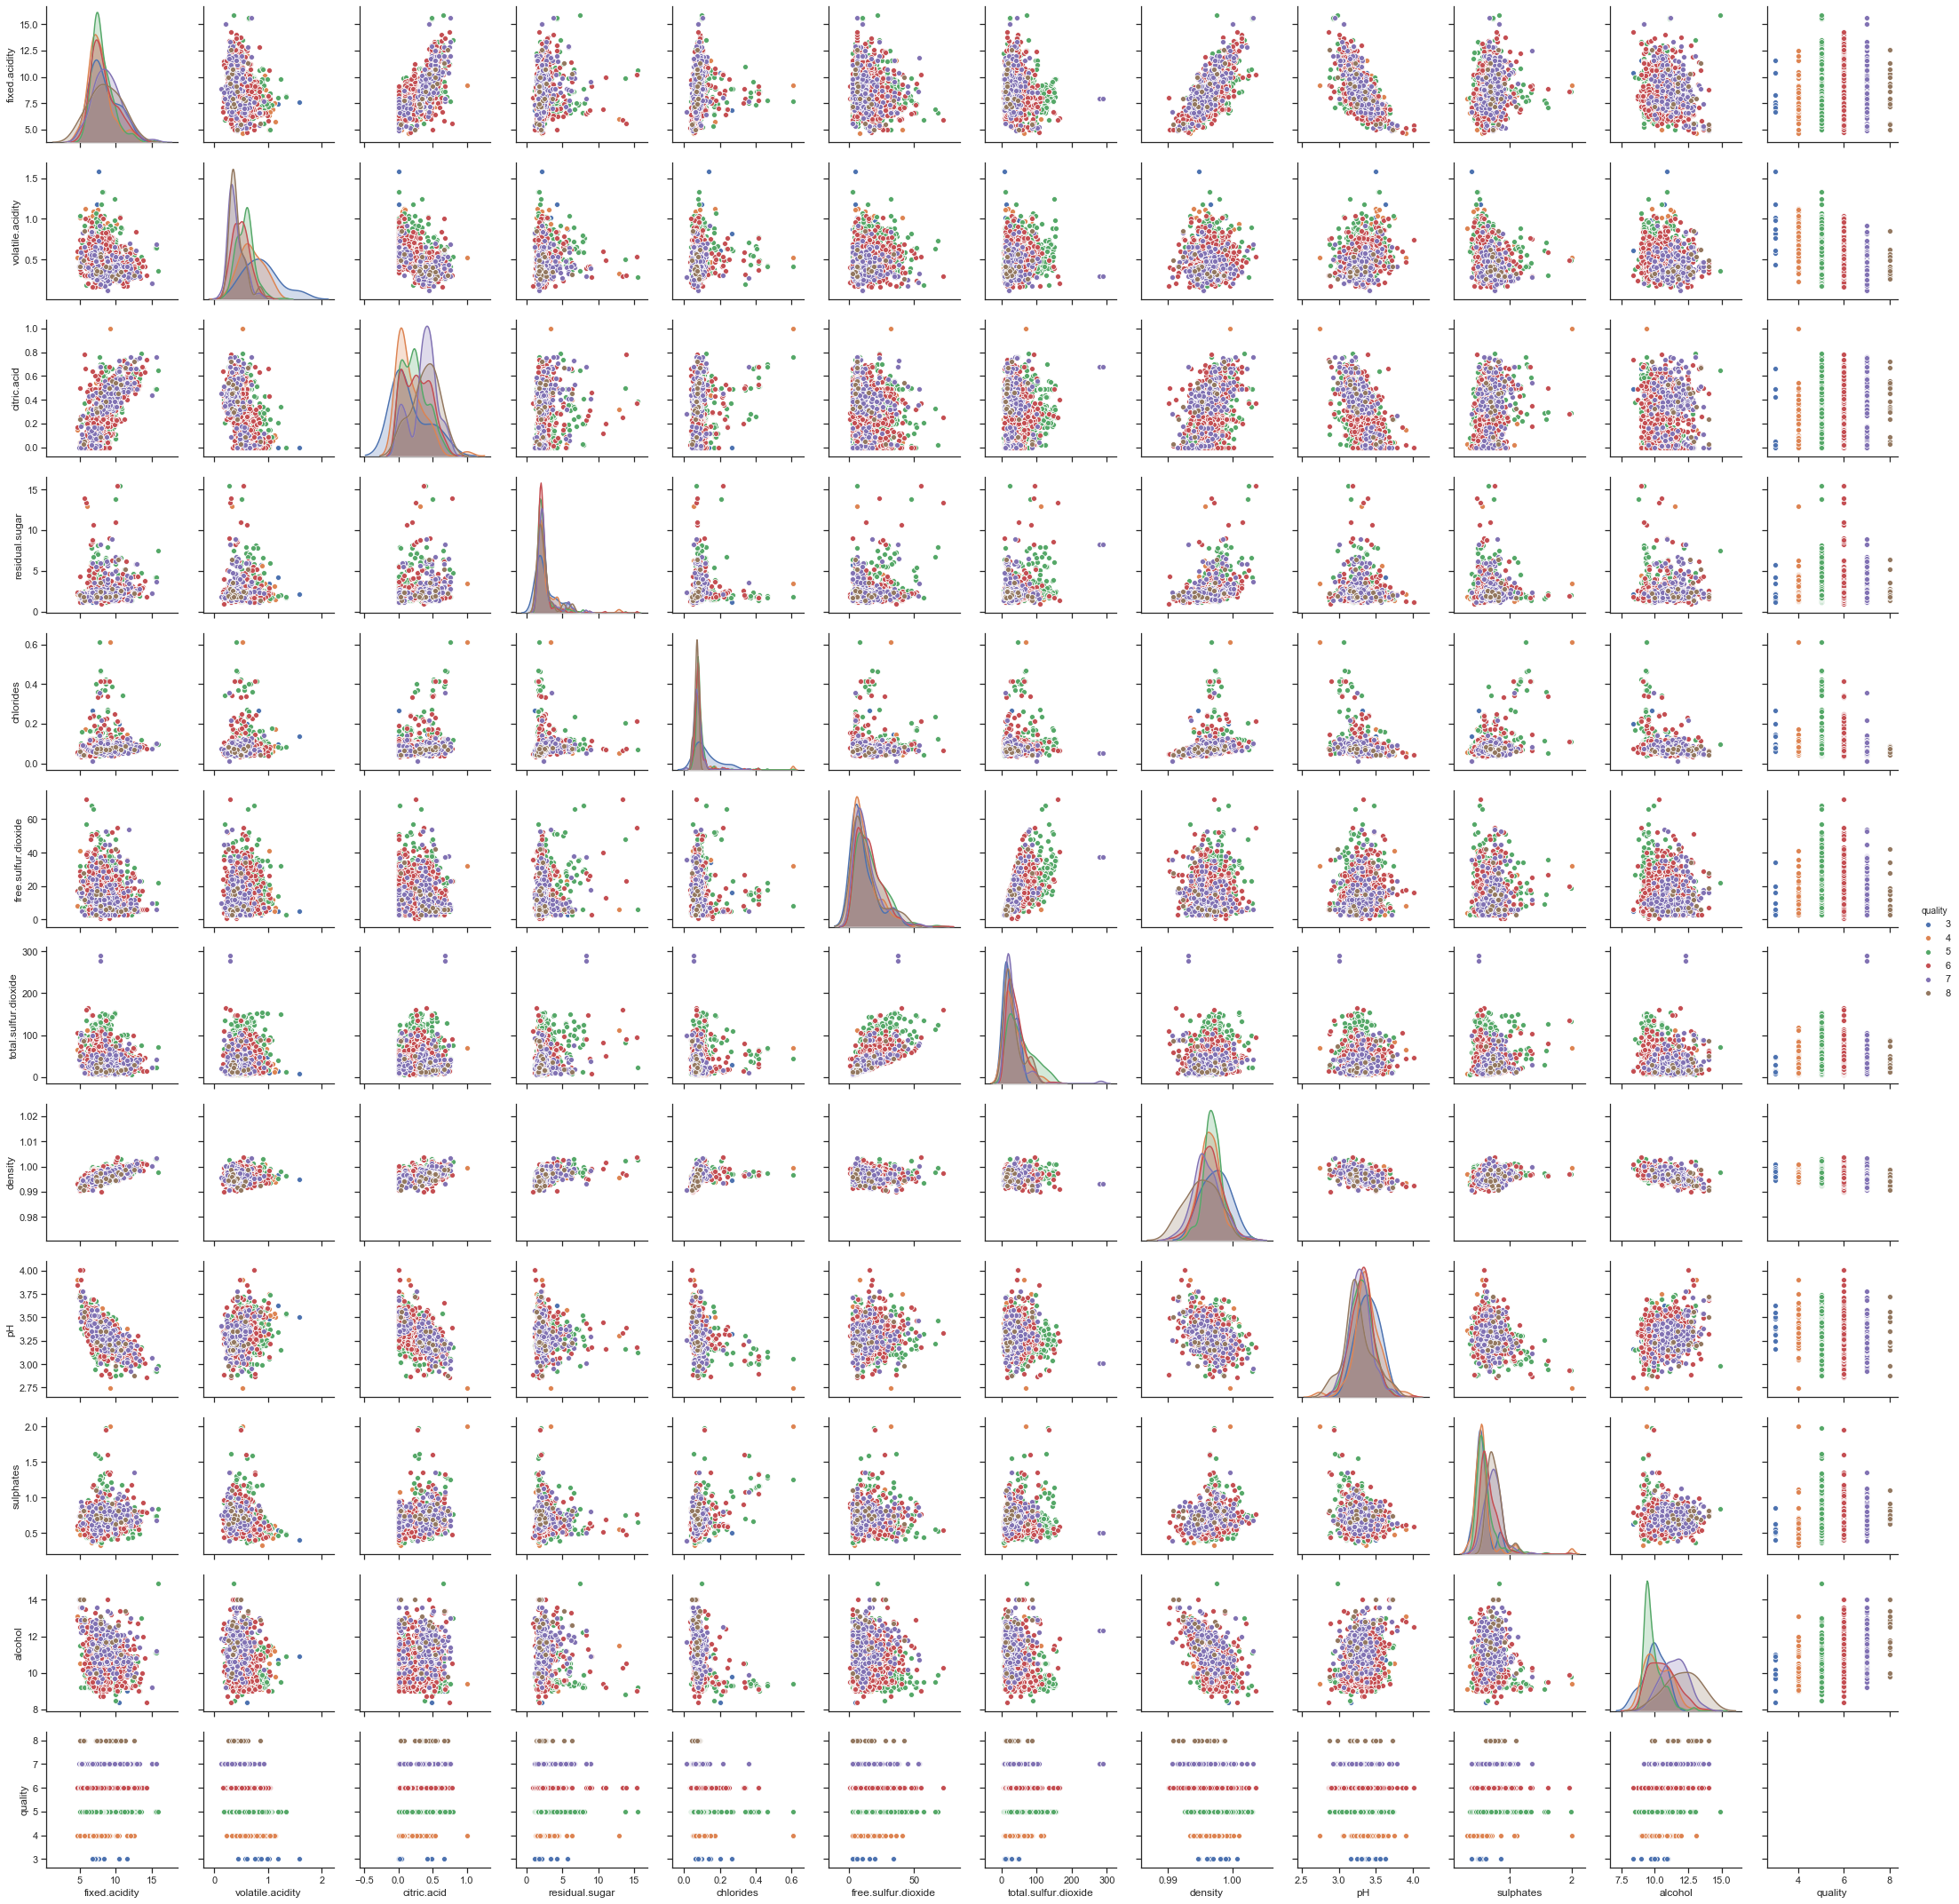

In [53]:
sns.set(style="ticks")

# df = sns.load_dataset("redWine")
sns.pairplot(data=redWine, hue="quality")

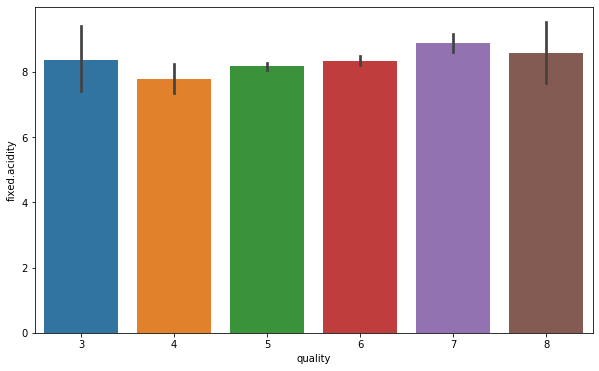

In [9]:
# Plot to see how independent data columns are distributed
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed.acidity', data = redWine)

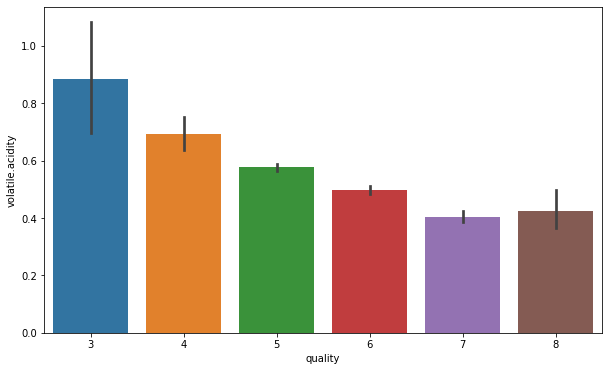

In [10]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile.acidity', data = redWine)

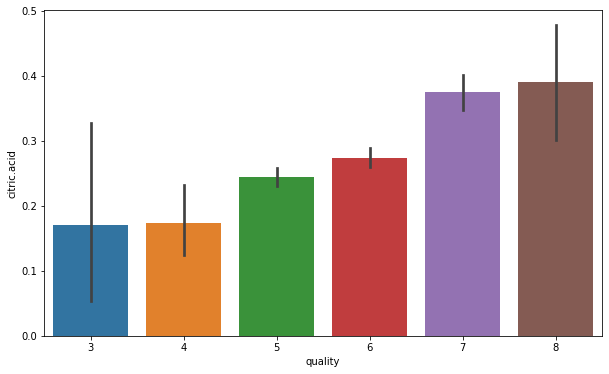

In [11]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric.acid', data = redWine)

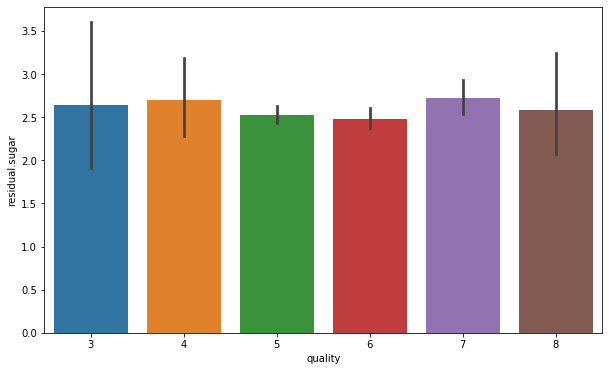

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual.sugar', data = redWine)

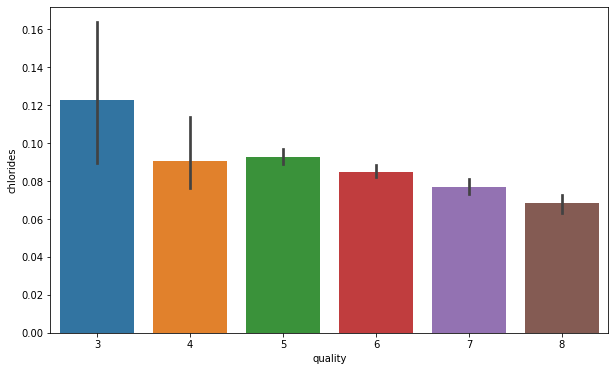

In [13]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = redWine)

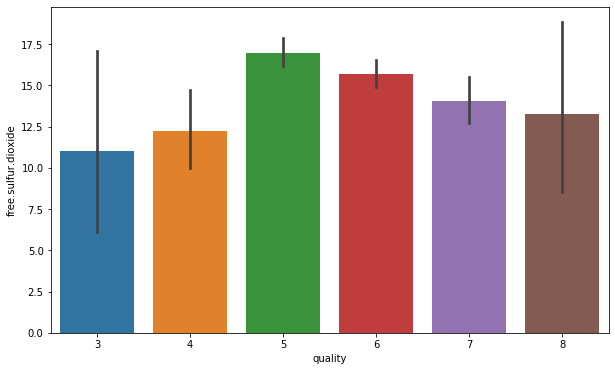

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free.sulfur.dioxide', data = redWine)

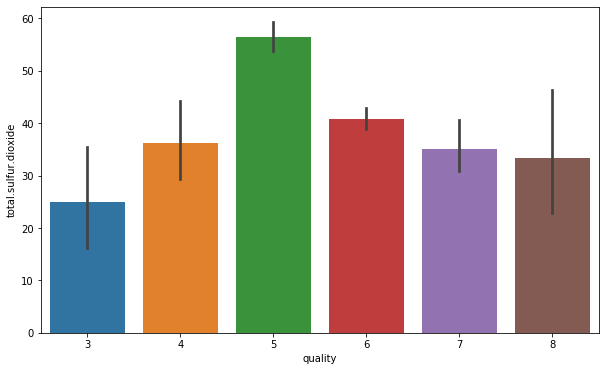

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total.sulfur.dioxide', data = redWine)

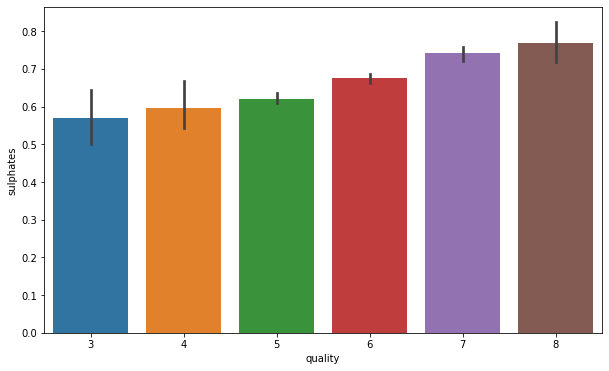

In [16]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = redWine)

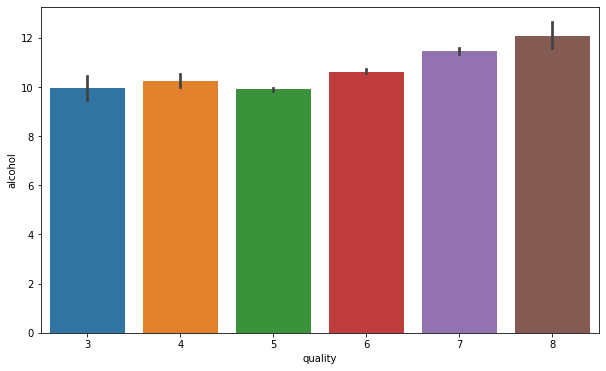

In [17]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = redWine)

# Linear Regression

In [6]:
#####Combined
X = combined[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
# X= X.values.reshape(-1, 1)

y = combined["quality"].values#.reshape(-1, 1)


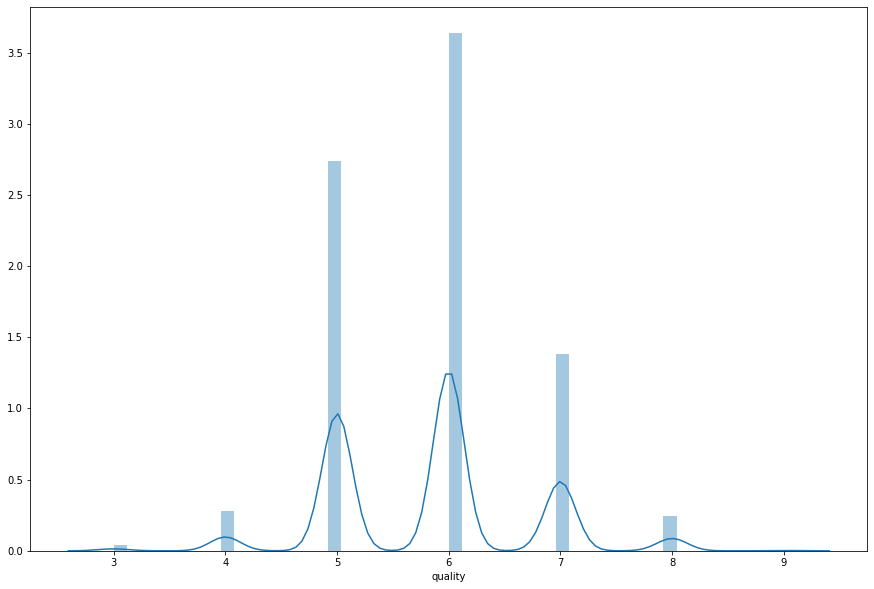

In [7]:
#Average value of quality
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(combined['quality'])

In [8]:
# Split-out test dataset 80% training, %20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Create model and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.29197837416680716


In [10]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

58.346416972001016
[ 7.45665219e-02 -1.30291069e+00 -1.12847290e-01  4.45418594e-02
 -6.93049430e-01  5.64867909e-03 -2.45007047e-03 -5.76955940e+01
  4.79530826e-01  7.67018310e-01  2.63290009e-01]


In [11]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,5.469321
1,6,6.347334
2,6,5.745761
3,5,4.739740
4,8,6.152253
5,5,5.654720
6,6,6.153215
7,6,5.567579
8,6,5.757363
9,6,6.301768


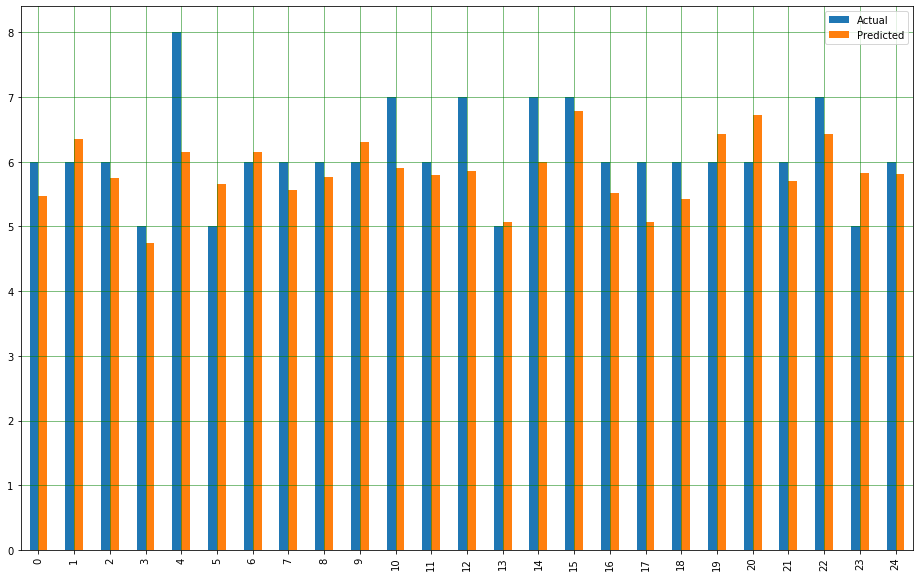

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

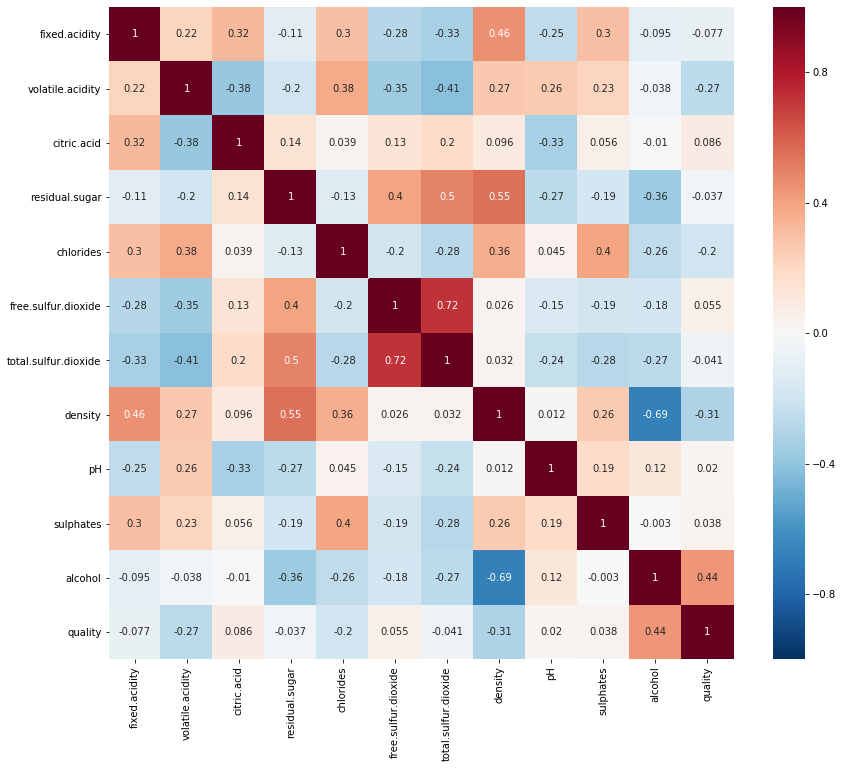

In [13]:
correlation = combined.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
# the squares with positive values show direct co-relationships between features. 
# The higher the values, the stronger these relationships are — they’ll be more reddish. 
# That means, if one feature increases, the other one also tends to increase, and vice-versa.

# The squares that have negative values show an inverse co-relationship. 
# The more negative these values get, the more inversely proportional they are, and they’ll be more blue. 
# This means that if the value of one feature is higher, the value of the other one gets lower.

# Finally, squares close to zero indicate almost no co-dependency between those sets of features.

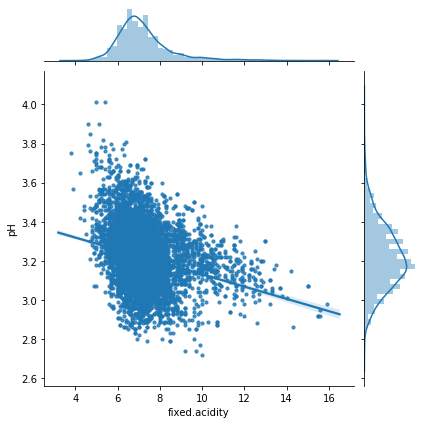

In [17]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = combined[['pH', 'fixed.acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed.acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

In [19]:
# For each feature find the data points with extreme high or low values
for feature in combined.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(combined[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(combined[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(combined[~((combined[feature] >= Q1 - step) & (combined[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = combined.drop(combined.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed.acidity':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
56,10.2,0.420,0.57,3.40,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
74,9.7,0.320,0.54,2.50,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5
113,10.1,0.310,0.44,2.30,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6
197,11.5,0.300,0.60,2.00,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6
205,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
209,11.0,0.300,0.58,2.10,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,7
210,9.7,0.530,0.60,2.00,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6
212,11.6,0.440,0.64,2.10,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,6


Data points considered outliers for the feature 'volatile.acidity':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
28,7.1,0.710,0.00,1.90,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5
30,6.7,0.675,0.07,2.40,0.089,17.0,82.0,0.99580,3.35,0.54,10.1,5
31,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
43,8.1,0.660,0.22,2.20,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5


Data points considered outliers for the feature 'citric.acid':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.90,5
28,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.40,5
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.80,6
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.60,6


Data points considered outliers for the feature 'residual.sugar':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1599,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
1606,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
1613,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
1637,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
1638,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
1702,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5
1710,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5
1773,7.5,0.270,0.31,17.70,0.051,33.0,173.0,0.99900,3.09,0.64,10.20,5
1781,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.70,5
1790,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.70,5


Data points considered outliers for the feature 'chlorides':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.60,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
46,7.7,0.935,0.43,2.20,0.114,22.0,114.0,0.99700,3.25,0.73,9.2,5


Data points considered outliers for the feature 'free.sulfur.dioxide':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1666,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
1896,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
1924,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1986,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
1994,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
2004,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
2058,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
2083,6.2,0.370,0.30,6.60,0.346,79.0,200.0,0.99540,3.29,0.58,9.6,5
2258,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
2330,6.2,0.250,0.48,10.00,0.044,78.0,240.0,0.99655,3.25,0.47,9.5,6


Data points considered outliers for the feature 'total.sulfur.dioxide':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
3977,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5
4751,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


Data points considered outliers for the feature 'density':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
3252,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3262,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
4380,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Data points considered outliers for the feature 'pH':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
297,7.1,0.630,0.06,2.00,0.083,8.0,29.0,0.99855,3.67,0.73,9.6,5
298,7.2,0.650,0.02,2.30,0.094,5.0,31.0,0.99930,3.67,0.80,9.7,5


Data points considered outliers for the feature 'sulphates':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.60,0.114,9.0,29.0,0.99740,3.26,1.56,9.100000,5
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.300000,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.200000,6
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.500000,6
43,8.1,0.660,0.22,2.20,0.069,9.0,23.0,0.99680,3.30,1.20,10.300000,5
69,8.0,0.705,0.05,1.90,0.074,8.0,19.0,0.99620,3.34,0.95,10.500000,6


Data points considered outliers for the feature 'alcohol':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5
5517,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
6102,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7


Data points considered outliers for the feature 'quality':


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


In [ ]:
###RED WINE

In [20]:
X = redWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
# X= X.values.reshape(-1, 1)

y = redWine["quality"].values#.reshape(-1, 1)



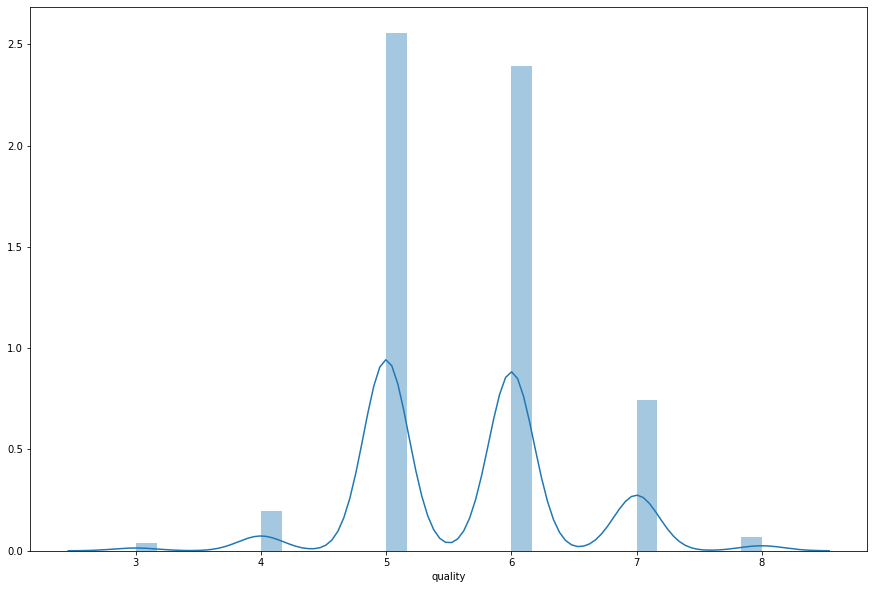

In [21]:
#Average value of quality
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(redWine['quality'])

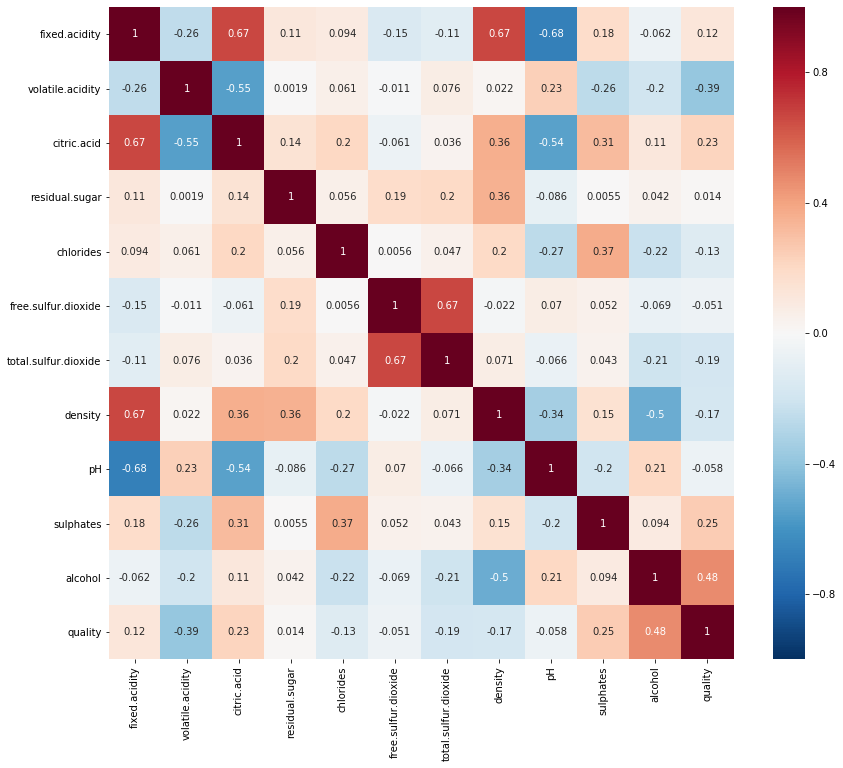

In [22]:
correlation = redWine.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [55]:
# Split-out test dataset 80% training, %20 test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [56]:
#Create model and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
# coeff_df

In [70]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3593724283394686


In [71]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

34.99871062872513
[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [72]:
y_pred = model.predict(X_test)

In [73]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


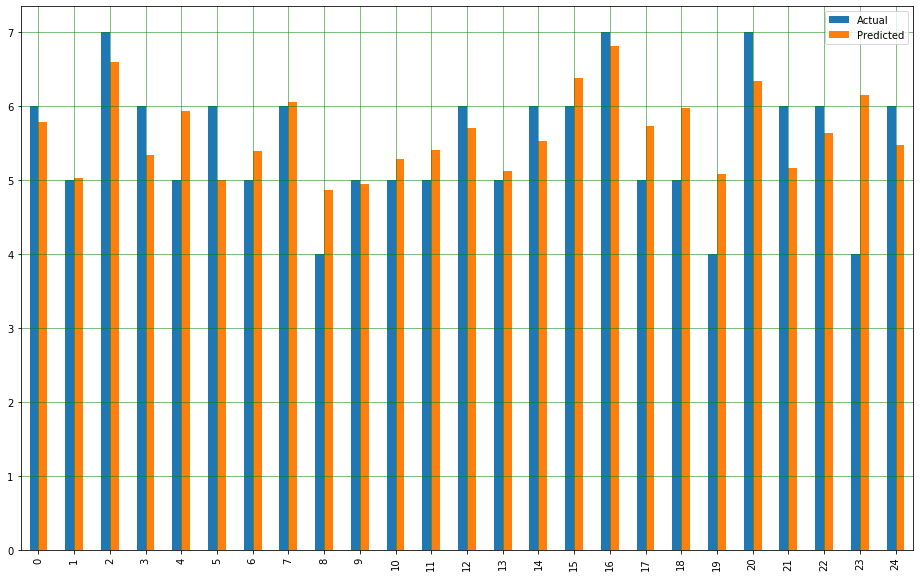

In [74]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611105
Mean Squared Error: 0.38447119782012473
Root Mean Squared Error: 0.620057414938427


In [ ]:
# the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, for example :
# Need more data: We need to have a huge amount of data to get the best possible prediction.
# Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
# Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

In [ ]:
#####################################################################

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.58
Accuracy of Logistic regression classifier on test set: 0.60


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.65


In [37]:
y_pred = clf.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,6
1,5,5
2,7,7
3,6,5
4,5,5
5,6,6
6,5,6
7,6,6
8,4,4
9,5,5


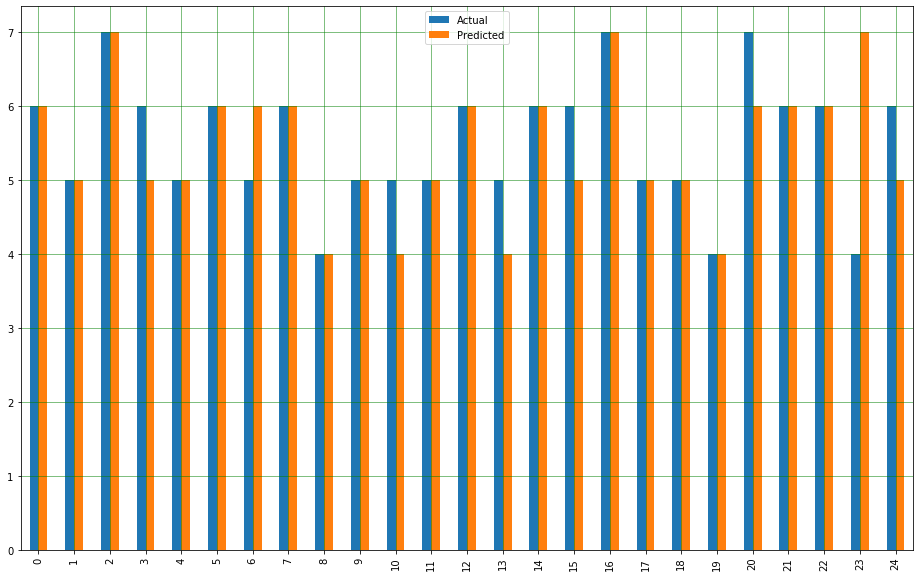

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.56


In [29]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.60
Accuracy of LDA classifier on test set: 0.61


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.55
Accuracy of GNB classifier on test set: 0.55


In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.56
Accuracy of SVM classifier on test set: 0.58


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
###############################################

In [ ]:
# Create a Validation Dataset

In [32]:
# # Assign X (data) and y (target)
# X = redWine[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
# y = redWine["quality"].values.reshape(-1, 1)

# array = redWine.values
# X = array[:,0:10]
# y = array[:,11]

# print(X.shape, y.shape)

(1599, 10) (1599,)


In [33]:
# # OR...
# X = redWine.drop("quality", axis=1)
# y = redWine["quality"]
# print(X.shape, y.shape)

In [34]:
# Split-out test dataset

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
#Create Train/Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Build Models
6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 0.566367 (0.024328)
LDA: 0.587991 (0.029239)
KNN: 0.565048 (0.041605)


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CART: 0.608092 (0.040620)
NB: 0.527116 (0.035955)


C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Krys\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SVM: 0.551278 (0.019469)


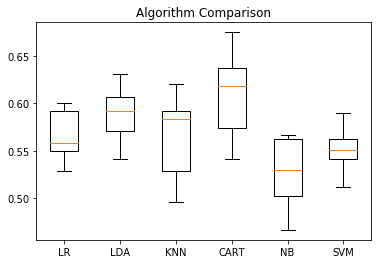

In [35]:

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [38]:

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {Y_test[:10].tolist()}")

First 10 Predictions:   [5. 5. 6. 5. 6. 6. 6. 5. 5. 6.]
First 10 Actual labels: [5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]


In [40]:
 pd.DataFrame({"Prediction": predictions, "Actual": Y_test}).reset_index(drop=True)

,Prediction,Actual
0,5.0,5.0
1,5.0,6.0
2,6.0,6.0
3,5.0,6.0
4,6.0,6.0
5,6.0,6.0
6,6.0,6.0
7,5.0,5.0
8,5.0,5.0
9,6.0,5.0


In [88]:
# Logistic Regression Model

# classifier = LogisticRegression()
# classifier

In [89]:
#  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

In [90]:
# Fit model using training data
# classifier.fit(X_train, y_train)

In [91]:
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

In [92]:
# validate the model using test data
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [93]:
# predictions
# predictions = classifier.predict(X_test)
# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [94]:
#  pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [ ]:
# First attempt#############################################################################

In [7]:

# Create a StandardScater model and fit it to the training data

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)


In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


In [10]:
 # Create a LinearRegression model and fit it to the scaled training data

# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

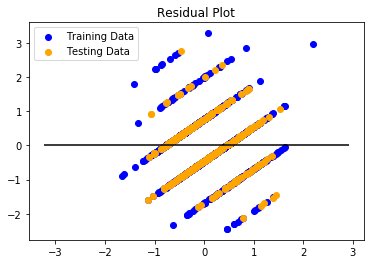

In [11]:
 # Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions


# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()


In [12]:
 # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
# A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.


# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)


# print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5861039318774236, R2: 0.3722831200818114


In [ ]:
 #Select Columns (features)
    # Set features. This will also be used as your x values.
# selected_features = df[['', '', '', '', '']]

In [ ]:
#Pre-processing
#Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
#Train the Model
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

In [ ]:
#Hyperparameter Tuning
# Use GridSearchCV to tune the model's parameters

In [ ]:
#Save the Model

In [ ]:
#NOTES
# SKLEARN
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
#  Stu_LSD.ipynb

# Linear Regression
# Mulitple Linear Regression
# Quanitfy Linear Regression
# Quantify Model
# A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1. R2 Score is the default scoring for many of the Sklearn models
# Validate
# Train/Test